In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid_df = pd.read_csv('data/covid_df.csv', sep=',', decimal='.')

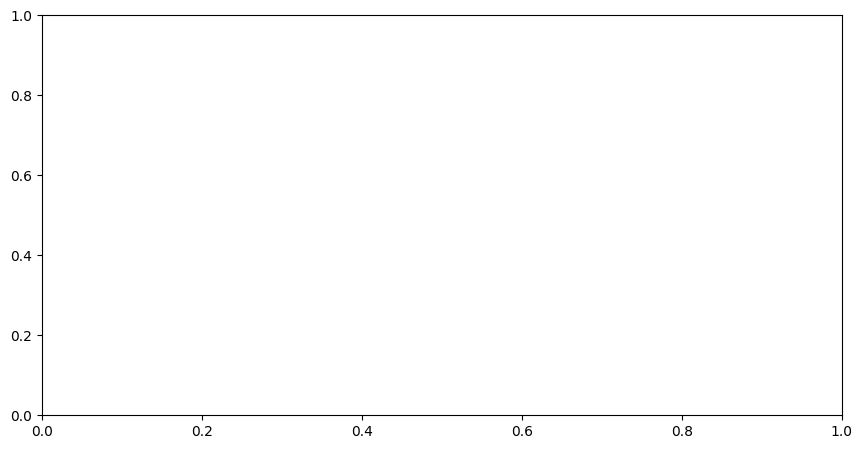

In [3]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

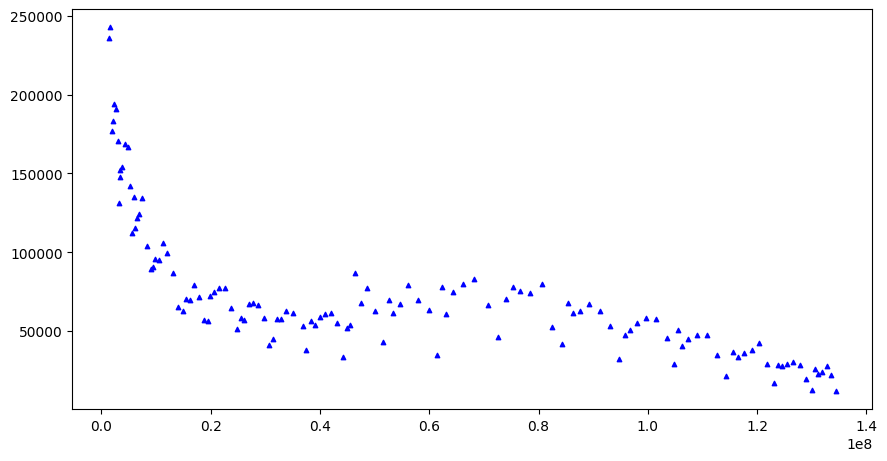

In [4]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=10,
    c='blue',
    marker='^'
)


([<matplotlib.patches.Wedge at 0x110cb52b220>,
 [Text(0.7665420934957, 0.9232622698341083, 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.5931469540063179, 0.9263782655875661, 'Oxford/AstraZeneca'),
  Text(-1.0669756518152362, 0.26751253883407417, 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(-0.9691397141646498, -0.5203539318856552, 'Oxford/AstraZeneca, Sinopharm/Beijing'),
  Text(-0.42855913880528995, -1.013082950476647, 'Oxford/AstraZeneca, Pfizer/BioNTech'),
  Text(0.162764772670222, -1.0878913680959192, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V'),
  Text(0.6404448584916131, -0.894332367317463, 'Moderna, Pfizer/BioNTech'),
  Text(0.9150658010408986, -0.610454404329577, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'),
  Text(1.03477305208093, -0.3731551027215323, 'Pfizer/BioNTech'),
  Text(1.092724197741022, -0.126308462389659, 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V')],
 [Text(0.4471495545391

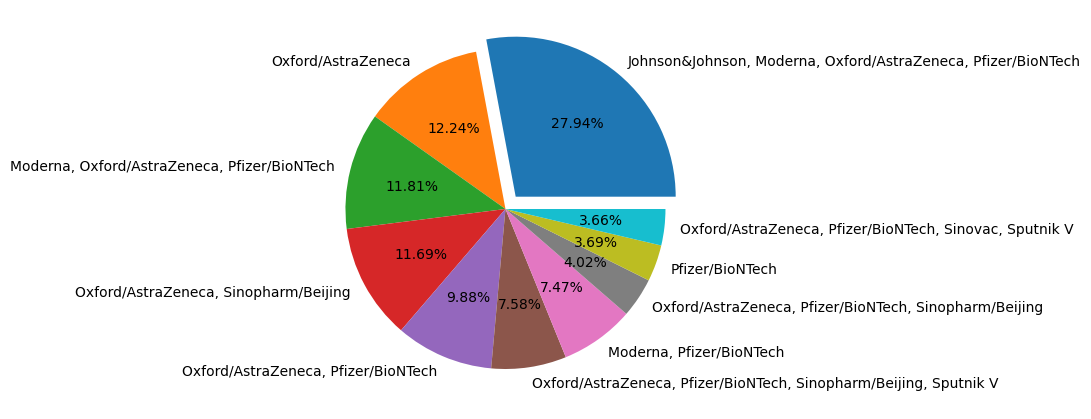

In [5]:
vaccines_combination = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines_combination,
    labels = vaccines_combination.index,
    autopct='%.2f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)

In [6]:
a='Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'
a = a.replace(' ', '').split(',')
type(a)

list

([<matplotlib.patches.Wedge at 0x110cb8c3370>,
 [Text(0.7631569069914733, 0.9260623819760783, 'Oxford/AstraZeneca'),
  Text(-0.7858288531813955, 0.7697226861068946, 'Pfizer/BioNTech'),
  Text(-1.0737492518932146, -0.23887767593218537, 'Sinopharm/Beijing'),
  Text(-0.6375806240742065, -0.8963765658500593, 'Moderna'),
  Text(0.009761828239201034, -1.09995668401507, 'SputnikV'),
  Text(0.5834629589773508, -0.9325078956777763, 'Johnson&Johnson'),
  Text(0.9574713497642411, -0.5415243432945952, 'Sinovac'),
  Text(1.088929522474283, -0.1556678999791865, 'other')],
 [Text(0.4451748624116927, 0.5402030561527122, '28.1%'),
  Text(-0.4286339199171248, 0.41984873787648797, '19.2%'),
  Text(-0.5856814101235716, -0.13029691414482839, '12.4%'),
  Text(-0.34777124949502164, -0.4889326722818505, '10.9%'),
  Text(0.005324633585018745, -0.599976373099129, '9.0%'),
  Text(0.31825252307855495, -0.5086406703696961, '8.5%'),
  Text(0.5222570998714041, -0.29537691452432463, '7.3%'),
  Text(0.5939615577132452

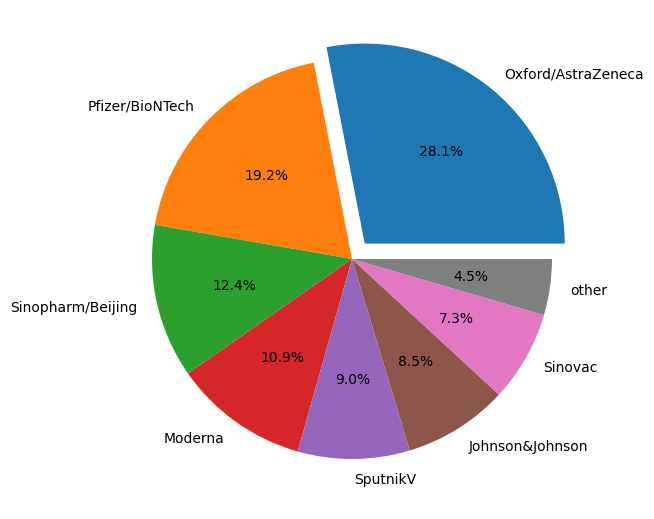

In [7]:
# Количество стран для каждой вакцины

#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]
#строим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0]
)

In [8]:
plt.style.use('default')

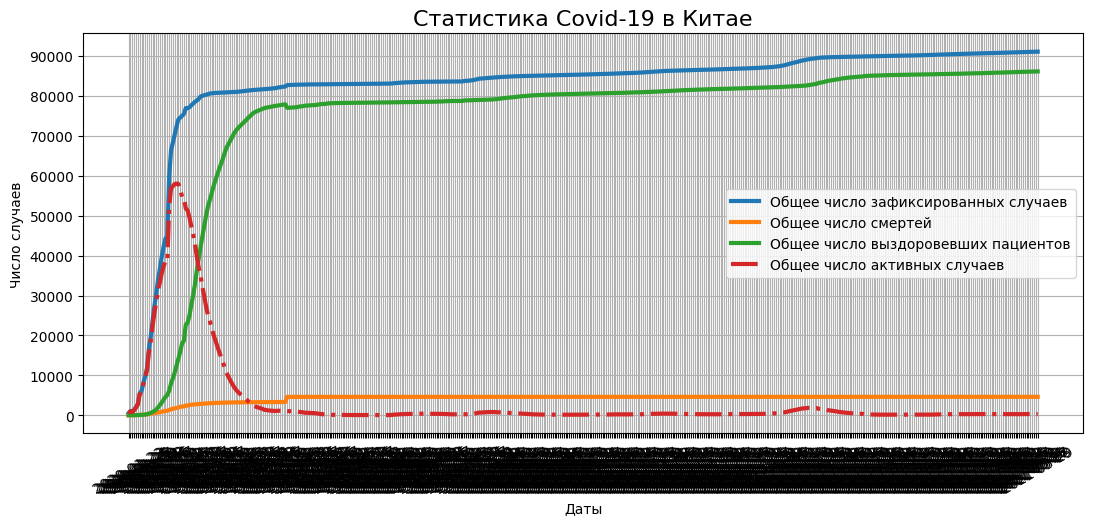

In [9]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashdot')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))

axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

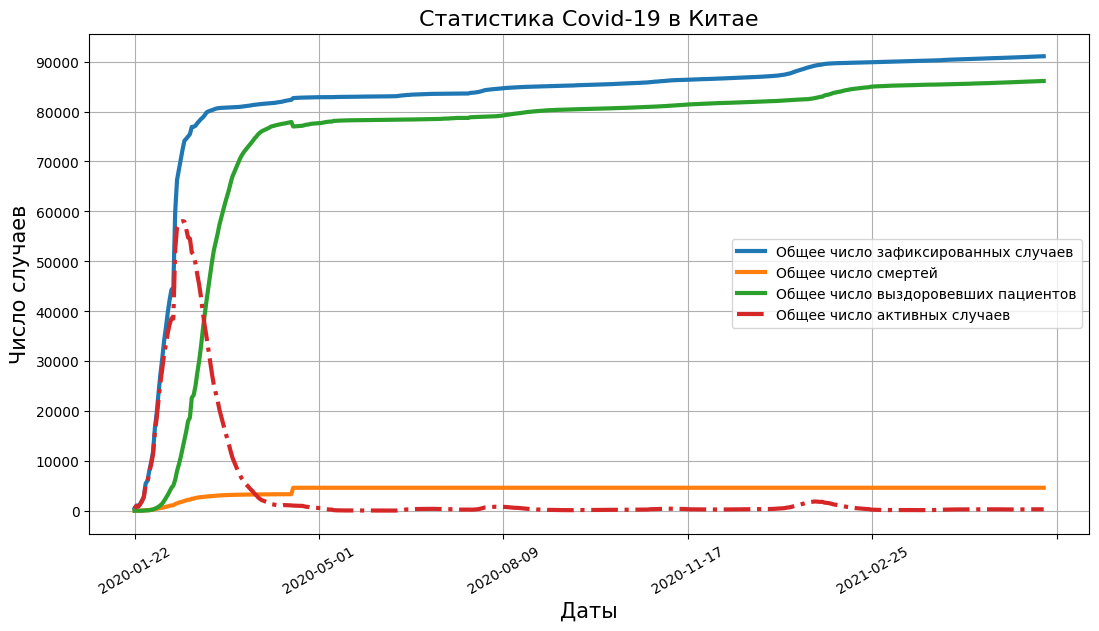

In [10]:
import matplotlib.ticker as pltticker
loc = pltticker.MultipleLocator(base=100.0)# this locator puts ticks at regular intervals

china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig=plt.figure(figsize=(10, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashdot')


#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты', fontsize=15)
axes.set_ylabel('Число случаев', fontsize=15)
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_major_locator(loc)
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend()

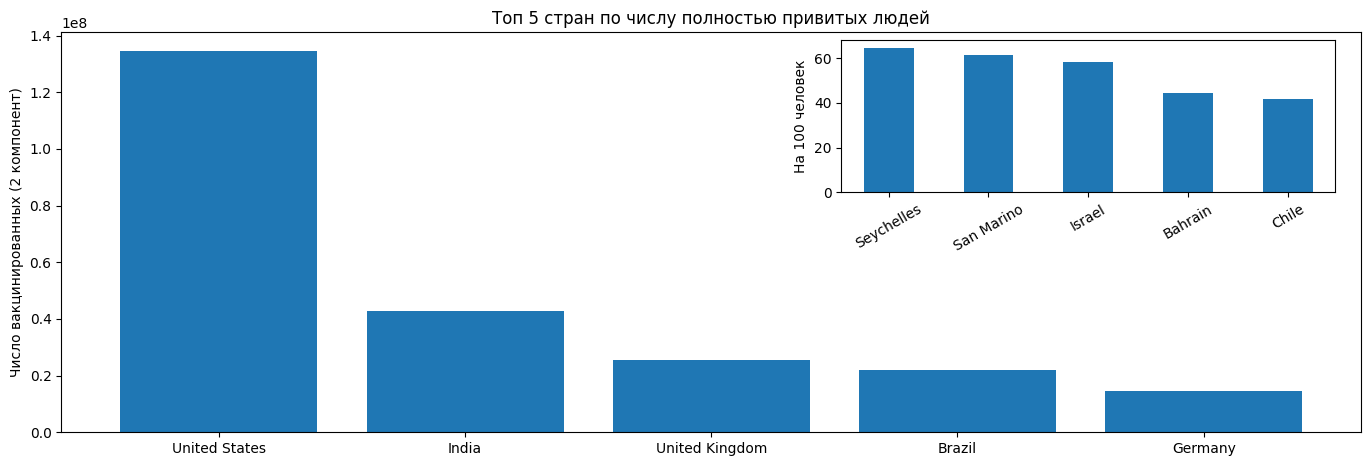

In [22]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x=vacc_country.index, height=vacc_country)
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=vacc_country_per_hundred.index, height=vacc_country_per_hundred, width=0.5)
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=30)


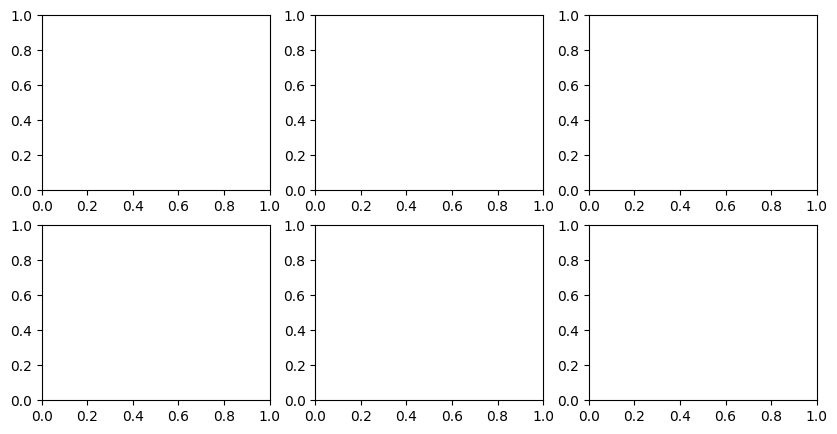

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

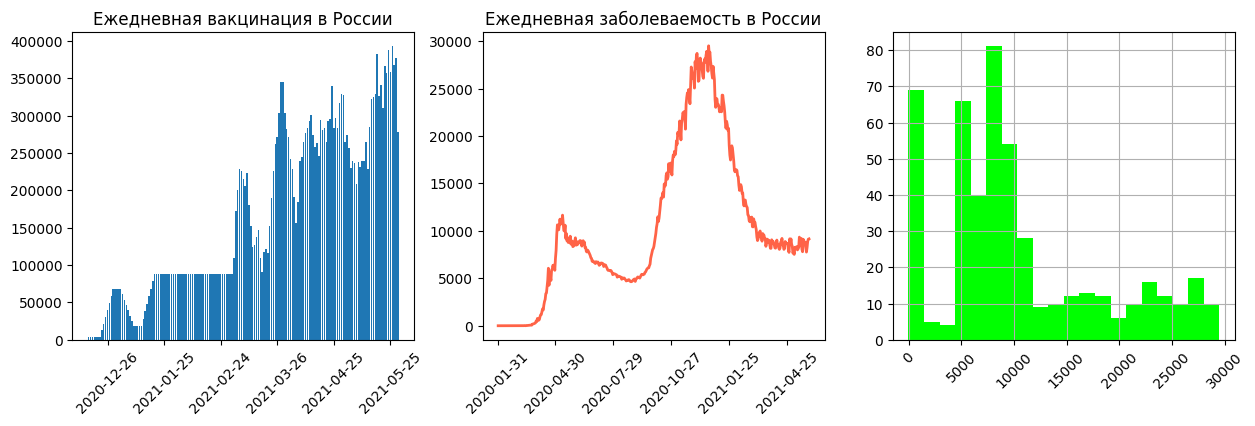

In [20]:
import matplotlib.ticker as pltticker
loc_1 = pltticker.MultipleLocator(base=30.0)
loc_2=pltticker.MultipleLocator(base=90.0)

russia_data = covid_df[covid_df['country'] == 'Russia']

# Визуализация диаграммы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)

axes[0].xaxis.set_major_locator(loc_1)
axes[0].xaxis.set_tick_params(rotation=45)
axes[0].set_title('Ежедневная вакцинация в России')

axes[1].plot(
    russia_data['date'], 
    russia_data['daily_confirmed'], 
    lw=2,
    color='tomato',
    label='Число заболевших'
    )

axes[1].xaxis.set_major_locator(loc_2)
axes[1].xaxis.set_tick_params(rotation=45)
axes[1].set_title('Ежедневная заболеваемость в России')

axes[2].hist(
    x=russia_data['daily_confirmed'], 
    label=["Число заболевших"], 
    color='lime', 
    bins=20)

axes[2].set_title='Гистограмма заболеваемости в России'
axes[2].xaxis.set_tick_params(rotation=45)
axes[2].grid()

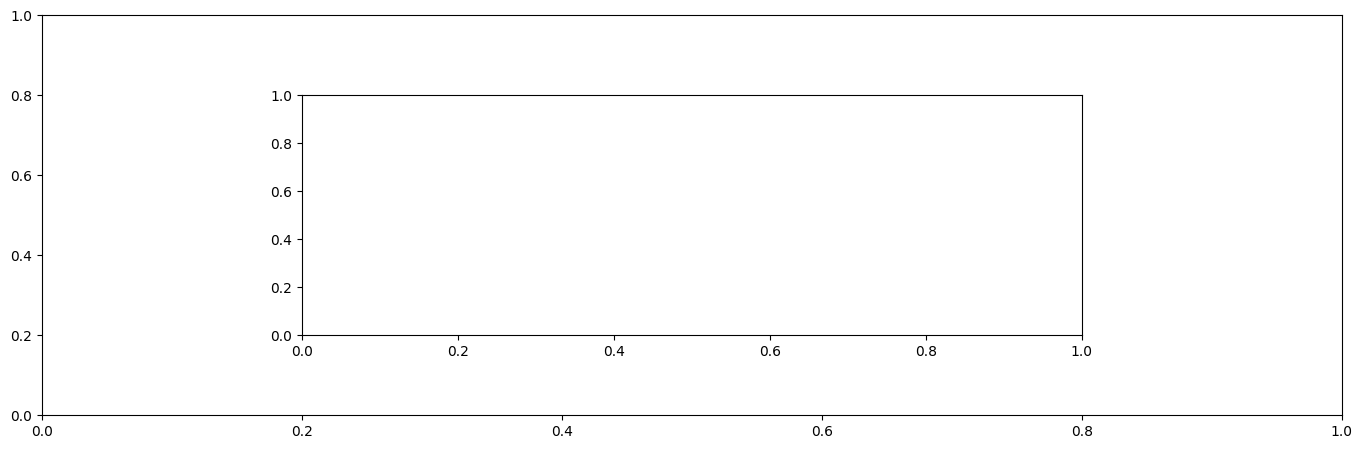

In [24]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

Text(0, 0.5, 'Ежедневная вакцинация в мире')

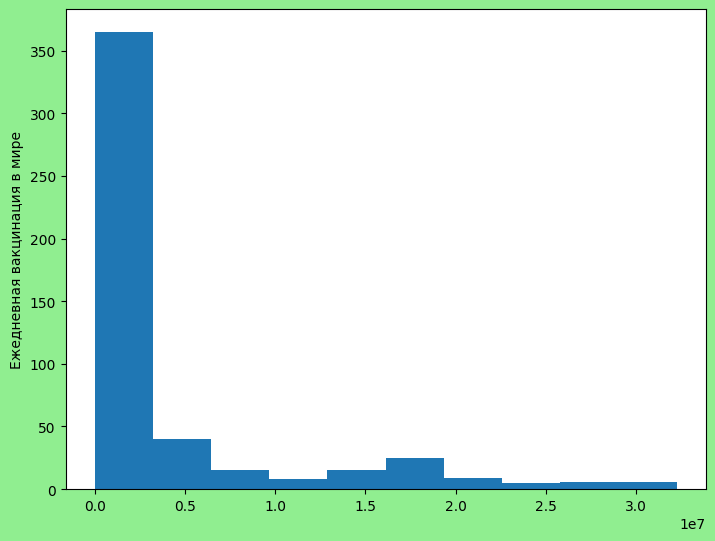

In [28]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире')
